In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue

In [2]:
rhino_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\rhino-detail-01.tif")[:,:,0]

In [3]:
body_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\bolt-clean.tif")[:,:,0]

In [4]:
# body_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\monkeyNoBoard.tif")[:,:,0]

(110, 110)


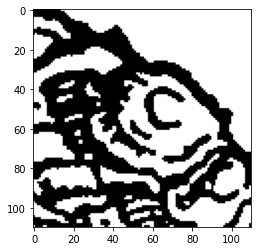

In [19]:
plt.imshow(rhino_img, cmap="gray")
print(rhino_img.shape)

(224, 250)


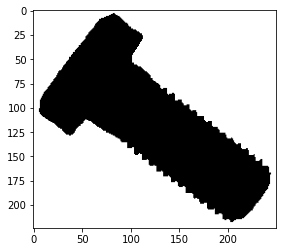

In [5]:
plt.imshow(body_img, cmap="gray")
print(body_img.shape)

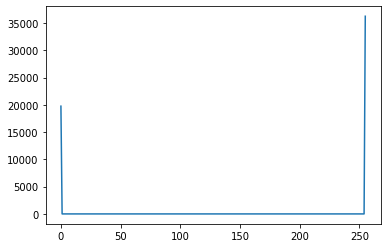

In [6]:
hist_bolt = cv2.calcHist([body_img], [0], None, [256], [0, 256])
plt.plot(hist_bolt)
plt.show()

In [7]:
np.where((body_img > 0) & (body_img < 255))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
def find_next_contour_point(initial_position, d, img, label_map):
    (h, w) = initial_position
    (height, width) = img.shape
    move_direction = ((1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1))
    # move_direction = ((1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1),(0,1),(1,1))
    for i in range(0,7):
        move = move_direction[d]
        h_s = h + move[0]
        w_s = w + move[1]
        if h_s>=0 and h_s<height and w_s>=0 and w_s<width:
            if img[h_s, w_s] == 255: # pixel is background
                label_map[h_s, w_s] = -1
                d = (d+1)%8
            else: # found non-background pixel
                return ((h_s, w_s), d)
        else: 
            d = (d+1)%8
    return (initial_position, d) # found no next node, return start position

In [9]:
# def find_next_contour_point(initial_position, d, img, label_map):
#     (h, w) = initial_position
#     (height, width) = img.shape
#     move_direction = ((1,0),(0,1),(-1,0),(0,-1))
#     for i in range(0,3):
#         move = move_direction[d]
#         h_s = h + move[0]
#         w_s = w + move[1]
#         if h_s>=0 and h_s<height and w_s>=0 and w_s<width:
#             if img[h_s, w_s] == 255: # pixel is background
#                 label_map[h_s, w_s] = -1
#                 d = (d+1)%4
#             else: # found non-background pixel
#                 return ((h_s, w_s), d)
#     return (initial_position, d) # found no next node, return start position

In [10]:
def trace_contour(start_pos, d_s, label, img, label_map, bin_img):
    (start_h, start_w) = start_pos
    (first_next, d) = find_next_contour_point(start_pos, d_s, img, label_map)
    (next_h, next_w) = first_next
    # contour = {"x":[], "y":[]}
    # contour["x"].append(next_h)
    # contour["y"].append(next_w)
    bin_img[start_h, start_w] = 255
    bin_img[next_h, next_w] = 255
    prev_pos = start_pos
    current_pos = (next_h, next_w)
    done = (current_pos == start_pos)
    cnt = 1
    print(start_pos)
    print(current_pos)
    print(f"{cnt} done: {done}")
    cnt+=1
    print("=================================")
    while done == False:
        (h_c, w_c) = current_pos
        label_map[h_c, w_c] = label
        # (current_pos, d) = find_next_contour_point(current_pos, d, img, label_map)
        (current_pos, d) = find_next_contour_point(current_pos, (d+6)%8, img, label_map)
        # (current_pos, d) = find_next_contour_point(current_pos, (d+3)%4, img, label_map)
        prev_pos = (h_c, w_c)
        # done = (prev_pos == start_pos) and (current_pos == first_next)
        done = (prev_pos == start_pos)
        print(d)
        print(prev_pos, start_pos)
        print(current_pos, first_next)
        print(f"{cnt} done: {done}")
        print("---------------------")
        if done == False:
            # contour["x"].append(h_n)
            # contour["y"].append(w_n)
            (h_n, w_n) = current_pos
            bin_img[h_n, w_n] = 255
            cnt += 1
        # if cnt == 10000: break
    return bin_img


In [16]:
def region_contour_labelling_test(img):
    (height, width) = img.shape
    for h in range(height):
        for w in range(width):
            if img[h,w] == 0: # foreground
                bin_img = np.zeros_like(img)
                lb_map = np.zeros_like(img)
                data = trace_contour((h,w), 0, 2, img, lb_map, bin_img)
                return data


In [17]:
data = region_contour_labelling_test(body_img)

(3, 82)
(4, 82)
1 done: False
6
(4, 82) (3, 82)
(4, 81) (4, 82)
2 done: False
---------------------
6
(4, 81) (3, 82)
(4, 80) (4, 82)
3 done: False
---------------------
7
(4, 80) (3, 82)
(5, 79) (4, 82)
4 done: False
---------------------
6
(5, 79) (3, 82)
(5, 78) (4, 82)
5 done: False
---------------------
7
(5, 78) (3, 82)
(6, 77) (4, 82)
6 done: False
---------------------
6
(6, 77) (3, 82)
(6, 76) (4, 82)
7 done: False
---------------------
6
(6, 76) (3, 82)
(6, 75) (4, 82)
8 done: False
---------------------
7
(6, 75) (3, 82)
(7, 74) (4, 82)
9 done: False
---------------------
6
(7, 74) (3, 82)
(7, 73) (4, 82)
10 done: False
---------------------
7
(7, 73) (3, 82)
(8, 72) (4, 82)
11 done: False
---------------------
6
(8, 72) (3, 82)
(8, 71) (4, 82)
12 done: False
---------------------
6
(8, 71) (3, 82)
(8, 70) (4, 82)
13 done: False
---------------------
7
(8, 70) (3, 82)
(9, 69) (4, 82)
14 done: False
---------------------
6
(9, 69) (3, 82)
(9, 68) (4, 82)
15 done: False
------

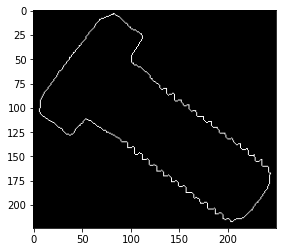

In [18]:
plt.imshow(data, cmap="gray")

(0, 0)
(1, 0)
1 done: False
0
(1, 0) (0, 0)
(2, 0) (1, 0)
2 done: False
---------------------
0
(2, 0) (0, 0)
(3, 0) (1, 0)
3 done: False
---------------------
2
(3, 0) (0, 0)
(3, 1) (1, 0)
4 done: False
---------------------
2
(3, 1) (0, 0)
(3, 2) (1, 0)
5 done: False
---------------------
2
(3, 2) (0, 0)
(3, 3) (1, 0)
6 done: False
---------------------
2
(3, 3) (0, 0)
(3, 4) (1, 0)
7 done: False
---------------------
1
(3, 4) (0, 0)
(4, 5) (1, 0)
8 done: False
---------------------
1
(4, 5) (0, 0)
(5, 6) (1, 0)
9 done: False
---------------------
2
(5, 6) (0, 0)
(5, 7) (1, 0)
10 done: False
---------------------
2
(5, 7) (0, 0)
(5, 8) (1, 0)
11 done: False
---------------------
2
(5, 8) (0, 0)
(5, 9) (1, 0)
12 done: False
---------------------
3
(5, 9) (0, 0)
(4, 10) (1, 0)
13 done: False
---------------------
1
(4, 10) (0, 0)
(5, 11) (1, 0)
14 done: False
---------------------
2
(5, 11) (0, 0)
(5, 12) (1, 0)
15 done: False
---------------------
1
(5, 12) (0, 0)
(6, 13) (1, 0)
16 do

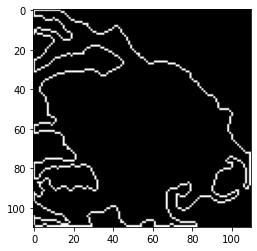

In [21]:
data = region_contour_labelling_test(rhino_img)
plt.imshow(data, cmap="gray")

In [ ]:
# def region_contour_labelling(img):
#     (height, width) = img.shape
#     bin_img = np.zeros_like(img)
#     # c_out = {"x":[], "y":[]}
#     # c_in = {"x":[], "y":[]}
#     label_map = np.zeros_like(img)
#     region_counter = 0

#     for h in range(height):
#         label = 0
#         for w in range(width):
#             if img[h,w] == 0: # foreground
#                 if label != 0:
#                     label_map[h, w] = label
#                 else:
#                     label = label_map[h, w]
#                     if label == 0:
#                         region_counter += 1
#                         label = region_counter
#                         start_pos = (h, w)
#                         contour = trace_contour(start_pos, label, img, label_map)
    

TODO

- Detect the inner contour (finishing `region_contour_labelling` function)
- Check the case that a pixel is visited more than once (Now, I think this code doesn't handle this case.)